In [1]:
import numpy as np
import sympy as sp
import plotly.graph_objects as go
import matplotlib.pyplot as plt

sp.init_printing(use_latex="mathjax")

In [2]:
x, y, z, f = sp.symbols("x y z f")

# 1


In [3]:
z = x * y + y**2

z_func = sp.lambdify((x, y), z, "numpy")

## Solve


In [4]:
point = np.array([5.0, 5.0])
lr = 1e-4
eps = 1e-6
max_iter = 10000

In [5]:
grid = [sp.diff(z, var) for var in (x, y)]
grid_func = sp.lambdify((x, y), grid, "numpy")

display(grid)

[y, x + 2⋅y]

In [6]:
path = [point.copy()]

for i in range(max_iter):
    grid_val = np.array(grid_func(*point), dtype=float)
    new_point = point - lr * grid_val
    path.append(new_point.copy())
    if np.linalg.norm(new_point - point) < eps:
        break
    point = new_point

path = np.array(path)
z_path = z_func(path[:, 0], path[:, 1])

display(path[-1], z_path[-1])

array([ 4.00644714, -1.02728937])

np.float64(-3.06045709782786)

### Plot


In [8]:
x_grid, y_grid = np.meshgrid(np.linspace(-6, 6, 1000), np.linspace(-6, 6, 1000))

z_grid = z_func(x_grid, y_grid)

In [11]:
# fig = go.Figure()

# fig.add_trace(
#     go.Surface(
#         x=x_grid,
#         y=y_grid,
#         z=z_grid,
#         colorscale="viridis",
#         opacity=0.85,
#         colorbar=dict(len=0.75),
#     )
# )
# fig.add_trace(
#     go.Scatter3d(
#         x=path[:, 0],
#         y=path[:, 1],
#         z=z_path,
#         mode="lines+markers",
#         line=dict(width=1, color="red"),
#         marker=dict(size=2, color="red"),
#         name="GD Path",
#         showlegend=True,
#     )
# )

# fig.update_layout(
#     title="GD plot",
#     scene=dict(xaxis_title="x", yaxis_title="y", zaxis_title="z"),
#     width=800,
#     height=600,
# )
# fig.show()

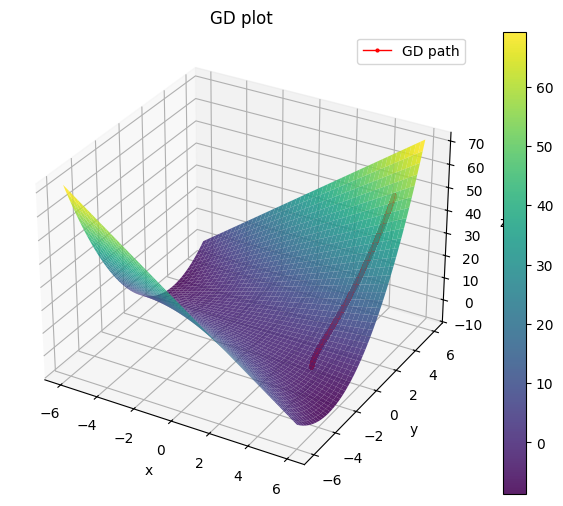

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap="viridis", alpha=0.875)
ax.plot(
    path[:, 0],
    path[:, 1],
    z_path,
    color="red",
    marker="o",
    markersize=2,
    linewidth=1,
    label="GD path",
)

fig.colorbar(surf)
ax.set_title("GD plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()